# 新北市眼底檢查資料整理 

## 表格整理 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dataframe_image as dfi

In [3]:
np.__version__

'1.26.1'

In [4]:
pd.__version__

'2.2.2'

In [5]:
# 載入資料
df_eye=pd.read_csv('./data/DFE_row.csv')
df_eye=df_eye.drop(['Unnamed: 0'],axis=1)
df_eye.head()

,amount,branch_type,category,da_id,hospital_area,hospital_code,hospital_name,indicator,total,Special_Type,SPECIAL_ID,overall_district,overall,year
0,4412.0,1,醫學中心,114,新北市板橋區,1131010011,醫療財團法人徐元智先生醫藥基金會亞東紀念醫院,24.57%,17954.0,1,0,0.2483,0.304,2011
1,2775.0,1,區域醫院,114,新北市新店區,1131050515,佛教慈濟醫療財團法人台北慈濟醫院,25.22%,10999.0,2,0,0.2483,0.304,2011
2,2941.0,1,區域醫院,114,新北市中和區,1331040513,衛生福利部雙和醫院〈委託臺北醫學大學興建經營〉,36.34%,8091.0,2,0,0.2483,0.304,2011
3,2959.0,1,區域醫院,114,新北市新店區,1231050017,天主教耕莘醫療財團法人耕莘醫院,39.52%,7486.0,2,0,0.2483,0.304,2011
4,1346.0,1,區域醫院,114,新北市三峽區,1131090019,行天宮醫療志業醫療財團法人恩主公醫院,18.66%,7212.0,2,0,0.2483,0.304,2011


In [6]:
df_eye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11096 entries, 0 to 11095
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            11096 non-null  float64
 1   branch_type       11096 non-null  int64  
 2   category          11096 non-null  object 
 3   da_id             11096 non-null  int64  
 4   hospital_area     11096 non-null  object 
 5   hospital_code     11096 non-null  object 
 6   hospital_name     11096 non-null  object 
 7   indicator         11096 non-null  object 
 8   total             11096 non-null  float64
 9   Special_Type      11096 non-null  int64  
 10  SPECIAL_ID        11096 non-null  int64  
 11  overall_district  11096 non-null  float64
 12  overall           11096 non-null  float64
 13  year              11096 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [7]:
# 檢查欄位有無其他字元
(df_eye.loc[:,'indicator'].str.contains((r'[^\d\.%]'))).sum()

0

In [8]:
# 消除%
df_eye.loc[:,'indicator']=df_eye.loc[:,'indicator'].str.replace('%','')

In [9]:
# 去除空格
df_eye.loc[:,'category']=df_eye.loc[:,'category'].str.strip()

In [10]:
df_eye.head()

,amount,branch_type,category,da_id,hospital_area,hospital_code,hospital_name,indicator,total,Special_Type,SPECIAL_ID,overall_district,overall,year
0,4412.0,1,醫學中心,114,新北市板橋區,1131010011,醫療財團法人徐元智先生醫藥基金會亞東紀念醫院,24.57,17954.0,1,0,0.2483,0.304,2011
1,2775.0,1,區域醫院,114,新北市新店區,1131050515,佛教慈濟醫療財團法人台北慈濟醫院,25.22,10999.0,2,0,0.2483,0.304,2011
2,2941.0,1,區域醫院,114,新北市中和區,1331040513,衛生福利部雙和醫院〈委託臺北醫學大學興建經營〉,36.34,8091.0,2,0,0.2483,0.304,2011
3,2959.0,1,區域醫院,114,新北市新店區,1231050017,天主教耕莘醫療財團法人耕莘醫院,39.52,7486.0,2,0,0.2483,0.304,2011
4,1346.0,1,區域醫院,114,新北市三峽區,1131090019,行天宮醫療志業醫療財團法人恩主公醫院,18.66,7212.0,2,0,0.2483,0.304,2011


In [11]:
# 擷取所需欄位(與網頁相同)
df=df_eye[['year','hospital_area','category','hospital_name','total','amount','indicator']]
# 變更型別
df.loc[:,'indicator']=df.loc[:,'indicator'].astype('float64')
df=df.infer_objects()

In [12]:
df.head()

,year,hospital_area,category,hospital_name,total,amount,indicator
0,2011,新北市板橋區,醫學中心,醫療財團法人徐元智先生醫藥基金會亞東紀念醫院,17954.0,4412.0,24.57
1,2011,新北市新店區,區域醫院,佛教慈濟醫療財團法人台北慈濟醫院,10999.0,2775.0,25.22
2,2011,新北市中和區,區域醫院,衛生福利部雙和醫院〈委託臺北醫學大學興建經營〉,8091.0,2941.0,36.34
3,2011,新北市新店區,區域醫院,天主教耕莘醫療財團法人耕莘醫院,7486.0,2959.0,39.52
4,2011,新北市三峽區,區域醫院,行天宮醫療志業醫療財團法人恩主公醫院,7212.0,1346.0,18.66


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11096 entries, 0 to 11095
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           11096 non-null  int64  
 1   hospital_area  11096 non-null  object 
 2   category       11096 non-null  object 
 3   hospital_name  11096 non-null  object 
 4   total          11096 non-null  float64
 5   amount         11096 non-null  float64
 6   indicator      11096 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 606.9+ KB


In [14]:
# 看有無重複
df.duplicated().sum()

0

In [15]:
# 查看糖尿病患為0的資料
sum(df['total']==0)

0

In [16]:
# 找出完全無檢查紀錄的醫院
series_noamount=df.groupby('hospital_name')['amount'].agg('sum')
hospital_noamount_list=list(series_noamount[series_noamount==0].index)
print(f'無檢查紀錄的醫院:{len(hospital_noamount_list)} 家')

無檢查紀錄的醫院:59 家


In [17]:
# 把無檢查紀錄的醫院從大表刪除
df_nozero=df.query('hospital_name not in @hospital_noamount_list')
display(df_nozero.head())
df_nozero.info()

,year,hospital_area,category,hospital_name,total,amount,indicator
0,2011,新北市板橋區,醫學中心,醫療財團法人徐元智先生醫藥基金會亞東紀念醫院,17954.0,4412.0,24.57
1,2011,新北市新店區,區域醫院,佛教慈濟醫療財團法人台北慈濟醫院,10999.0,2775.0,25.22
2,2011,新北市中和區,區域醫院,衛生福利部雙和醫院〈委託臺北醫學大學興建經營〉,8091.0,2941.0,36.34
3,2011,新北市新店區,區域醫院,天主教耕莘醫療財團法人耕莘醫院,7486.0,2959.0,39.52
4,2011,新北市三峽區,區域醫院,行天宮醫療志業醫療財團法人恩主公醫院,7212.0,1346.0,18.66


<class 'pandas.core.frame.DataFrame'>
Index: 10948 entries, 0 to 11095
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10948 non-null  int64  
 1   hospital_area  10948 non-null  object 
 2   category       10948 non-null  object 
 3   hospital_name  10948 non-null  object 
 4   total          10948 non-null  float64
 5   amount         10948 non-null  float64
 6   indicator      10948 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 684.2+ KB


## 醫院and類別群組 

In [18]:
df_byname=df_nozero.groupby('hospital_name')
df_name=df_byname.agg({'hospital_area':lambda x : ''.join(x.unique()),'category': lambda x : ''.join(x.unique()),
             'amount':'sum','total':'sum','indicator':'mean'}).reset_index()

df_name.columns=['hospital_name', 'hospital_area', 'category', 'amount_sum', 'total_sum',
       'indicator_mean']
df_name.head()

,hospital_name,hospital_area,category,amount_sum,total_sum,indicator_mean
0,一生診所,新北市新莊區,診所,34.0,204.0,16.292308
1,一盧診所,新北市三峽區,診所,100.0,580.0,16.776923
2,丁良文內科診所,新北市蘆洲區,診所,1977.0,3183.0,60.280000
3,三和診所,新北市三重區,診所,108.0,636.0,16.820000
4,三安診所,新北市土城區,診所,2.0,10.0,11.110000


In [19]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hospital_name   1134 non-null   object 
 1   hospital_area   1134 non-null   object 
 2   category        1134 non-null   object 
 3   amount_sum      1134 non-null   float64
 4   total_sum       1134 non-null   float64
 5   indicator_mean  1134 non-null   float64
dtypes: float64(3), object(3)
memory usage: 53.3+ KB


In [20]:
# 查看數量
df_name['category'].value_counts().sort_values()

category
醫學中心       1
區域醫院       9
地區醫院      33
診所      1091
Name: count, dtype: int64

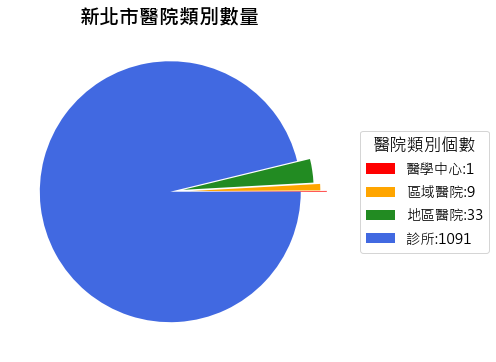

In [149]:
# 醫院類別分布圓餅圖
labels = ['醫學中心:1', '區域醫院:9','地區醫院:33','診所:1091']

plt.figure(figsize=(10,6))
patches, texts=plt.pie(df_name['category'].value_counts().sort_values(),
                       explode=(0.2, 0.15, 0.1, 0),colors=['r','orange','forestgreen','royalblue'])
plt.legend(patches,labels,loc='center right',title='醫院類別個數',
           bbox_to_anchor=(1, 0, 0.5, 1),fontsize='x-large',title_fontsize='xx-large')

plt.title('新北市醫院類別數量',fontsize=20,fontweight='heavy',loc='center')
#plt.savefig('./graph/hosNumber_bycategory.png')
plt.show()


In [22]:
# 再以category 群組
# 醫學中心
df_name_Center=df_name.groupby('category').get_group('醫學中心').reset_index(drop=True)
df_name_Center

,hospital_name,hospital_area,category,amount_sum,total_sum,indicator_mean
0,醫療財團法人徐元智先生醫藥基金會亞東紀念醫院,新北市板橋區,醫學中心,207870.0,331054.0,61.735385


In [78]:
df_name_Center.loc[:,'indicator_mean']=name_Center=df_name_Center.loc[:,'indicator_mean'].round(2)
name_Center=df_name_Center.drop(['category','amount_sum','total_sum'],axis=1)
name_Center.columns=columns=['醫院名稱','地區','檢查率%(2011-2023)']
name_Center

,醫院名稱,地區,檢查率%(2011-2023)
0,醫療財團法人徐元智先生醫藥基金會亞東紀念醫院,新北市板橋區,61.74


In [23]:
# 再以category 群組
# 區域醫院
df_name_Regional=df_name.groupby('category').get_group('區域醫院').reset_index(drop=True)
df_name_Regional

,hospital_name,hospital_area,category,amount_sum,total_sum,indicator_mean
0,佛教慈濟醫療財團法人台北慈濟醫院,新北市新店區,區域醫院,58573.0,178742.0,32.474615
1,國泰醫療財團法人汐止國泰綜合醫院,新北市汐止區,區域醫院,32171.0,94813.0,33.531538
2,天主教耕莘醫療財團法人耕莘醫院,新北市新店區,區域醫院,51130.0,137421.0,37.271538
3,新北市立聯合醫院,新北市三重區,區域醫院,34855.0,67534.0,51.597778
4,行天宮醫療志業醫療財團法人恩主公醫院,新北市三峽區,區域醫院,28280.0,120830.0,23.178462
5,衛生福利部八里療養院,新北市八里區,區域醫院,30.0,311.0,8.883333
6,衛生福利部臺北醫院,新北市新莊區,區域醫院,29533.0,68188.0,43.174444
7,衛生福利部雙和醫院〈委託臺北醫學大學興建經營〉,新北市中和區,區域醫院,94178.0,195930.0,46.011538
8,輔仁大學學校財團法人輔仁大學附設醫院,新北市泰山區,區域醫院,16004.0,47151.0,34.020000


In [83]:
# 檢查率排名top3
name_Regional_sort=df_name_Regional.sort_values(by='indicator_mean',axis=0,ascending=False).reset_index(drop=True)
name_Regional_top3=name_Regional_sort[0:3]
name_Regional_top3.loc[:,'indicator_mean']=name_Regional_top3['indicator_mean'].round(2)
name_Regional_top3=name_Regional_top3.drop(['category','amount_sum','total_sum'],axis=1)
name_Regional_top3.columns=['醫院名稱','地區','平均檢查率%(2011-2023)']
name_Regional_top3=name_Regional_top3.reset_index(drop=True)
name_Regional_top3

,醫院名稱,地區,平均檢查率%(2011-2023)
0,新北市立聯合醫院,新北市三重區,51.60
1,衛生福利部雙和醫院〈委託臺北醫學大學興建經營〉,新北市中和區,46.01
2,衛生福利部臺北醫院,新北市新莊區,43.17


In [84]:
# 檢查率排名last3
name_Regional_last3=name_Regional_sort[-3:]
name_Regional_last3.loc[:,'indicator_mean']=name_Regional_last3['indicator_mean'].round(2)
name_Regional_last3=name_Regional_last3.drop(['category','amount_sum','total_sum'],axis=1)
name_Regional_last3.columns=['醫院名稱','地區','平均檢查率%(2011-2023)']
name_Regional_last3=name_Regional_last3.reset_index(drop=True)
name_Regional_last3

,醫院名稱,地區,平均檢查率%(2011-2023)
0,佛教慈濟醫療財團法人台北慈濟醫院,新北市新店區,32.47
1,行天宮醫療志業醫療財團法人恩主公醫院,新北市三峽區,23.18
2,衛生福利部八里療養院,新北市八里區,8.88


In [26]:
# 再以category 群組
# 地區醫院
df_name_District=df_name.groupby('category').get_group('地區醫院').reset_index(drop=True)
df_name_District.head()

,hospital_name,hospital_area,category,amount_sum,total_sum,indicator_mean
0,三重中興醫院,新北市三重區,地區醫院,143.0,1629.0,8.620769
1,中祥醫院,新北市中和區,地區醫院,647.0,4008.0,16.203077
2,中英醫療社團法人中英醫院,新北市板橋區,地區醫院,1046.0,5808.0,18.135556
3,中英醫療社團法人板英醫院,新北市板橋區,地區醫院,491.0,1702.0,26.345556
4,仁安醫院,新北市土城區,地區醫院,256.0,2012.0,12.584615


In [86]:
# 檢查率排名top3
name_District_sort=df_name_District.sort_values(by='indicator_mean',axis=0,ascending=False).reset_index(drop=True)
name_District_top3=name_District_sort[0:3]
name_District_top3.loc[:,'indicator_mean']=name_District_top3['indicator_mean'].round(2)
name_District_top3=name_District_top3.drop(['category','amount_sum','total_sum'],axis=1)
name_District_top3.columns=['醫院名稱','地區','平均檢查率%(2011-2023)']
name_District_top3=name_District_top3.reset_index(drop=True)
name_District_top3

,醫院名稱,地區,平均檢查率%(2011-2023)
0,新北市立土城醫院（委託長庚醫療財團法人興建經營）,新北市土城區,62.86
1,衛生福利部樂生療養院,新北市新莊區,43.93
2,宏仁醫院,新北市三重區,43.78


In [87]:
# 檢查率排名last3
name_District_last3=name_District_sort[-3:]
name_District_last3.loc[:,'indicator_mean']=name_District_last3['indicator_mean'].round(2)
name_District_last3=name_District_last3.drop(['category','amount_sum','total_sum'],axis=1)
name_District_last3.columns=['醫院名稱','地區','平均檢查率%(2011-2023)']
name_District_last3=name_District_last3.reset_index(drop=True)
name_District_last3

,醫院名稱,地區,平均檢查率%(2011-2023)
0,財團法人台灣省私立台北仁濟院附設新莊仁濟醫院,新北市新莊區,8.00
1,清福醫院,新北市三峽區,7.57
2,恩樺醫院,新北市土城區,7.33


In [29]:
# 再以category 群組
# 地區醫院
df_name_Clinic=df_name.groupby('category').get_group('診所').reset_index(drop=True)
df_name_Clinic.head()

,hospital_name,hospital_area,category,amount_sum,total_sum,indicator_mean
0,一生診所,新北市新莊區,診所,34.0,204.0,16.292308
1,一盧診所,新北市三峽區,診所,100.0,580.0,16.776923
2,丁良文內科診所,新北市蘆洲區,診所,1977.0,3183.0,60.280000
3,三和診所,新北市三重區,診所,108.0,636.0,16.820000
4,三安診所,新北市土城區,診所,2.0,10.0,11.110000


In [41]:
# indicator_mean=100
name_Clinic_100=df_name_Clinic.query('indicator_mean == 100 ').reset_index(drop=True)
name_Clinic_100.columns=['醫院名稱','地區','醫院類別','檢查總人數','糖尿病總人數','平均檢查率%(2011-2023)']
name_Clinic_100

,醫院名稱,地區,醫院類別,檢查總人數,糖尿病總人數,平均檢查率%(2011-2023)
0,博宏眼科診所,新北市永和區,診所,1.0,1.0,100.0
1,大為診所,新北市新店區,診所,1.0,1.0,100.0
2,安坑振榕診所,新北市新店區,診所,1.0,1.0,100.0
3,宥宥小兒科診所,新北市蘆洲區,診所,1.0,1.0,100.0
4,建國耳鼻喉科診所,新北市鶯歌區,診所,2.0,2.0,100.0
5,張婦產科診所,新北市永和區,診所,3.0,3.0,100.0
6,得揚診所,新北市永和區,診所,1.0,1.0,100.0
7,惠心婦產科小兒科診所,新北市三重區,診所,1.0,1.0,100.0
8,李復健科骨科診所,新北市新莊區,診所,2.0,2.0,100.0
9,柚子小兒科診所,新北市樹林區,診所,1.0,1.0,100.0


In [38]:
# 檢查率排名
# 100%不列入排名
name_Clinic_sort=df_name_Clinic.query('indicator_mean<100 ').sort_values(by='indicator_mean',axis=0,ascending=False).reset_index(drop=True)
name_Clinic_top3=name_Clinic_sort[0:3]
name_Clinic_top3.loc[:,'indicator_mean']=name_Clinic_top3['indicator_mean'].round(2)
name_Clinic_top3=name_Clinic_top3.drop(['category','amount_sum','total_sum'],axis=1)
name_Clinic_top3.columns=['醫院名稱','地區','檢查率%(2011-2023)']
name_Clinic_top3=name_Clinic_top3.reset_index(drop=True)
name_Clinic_top3

,醫院名稱,地區,檢查率%(2011-2023)
0,蘇景傑診所,新北市新店區,94.46
1,翰生診所,新北市板橋區,86.53
2,漢生診所,新北市板橋區,85.18


In [70]:
# 檢查率排名last3
# 100%不列入排名
name_Clinic_last3=name_Clinic_sort[-3:]
name_Clinic_last3.loc[:,'indicator_mean']=name_Clinic_last3['indicator_mean'].round(2)
name_Clinic_last3=name_Clinic_last3.drop(['category','amount_sum','total_sum'],axis=1)
name_Clinic_last3.columns=['醫院名稱','地區','平均檢查率%(2011-2023)']
name_Clinic_last3=name_Clinic_last3.reset_index(drop=True)
name_Clinic_last3

,醫院名稱,地區,平均檢查率%(2011-2023)
0,劍橋診所,新北市中和區,2.50
1,永悅診所,新北市新莊區,2.50
2,菲絲美診所,新北市淡水區,2.08


#### 匯出表格圖 

In [91]:
# 所有分級前三名與後三名(排除完全沒有檢查紀錄的醫院)表格匯出
#adding a gradient based on values in cell
# proplem:'ColormapRegistry' object has no attribute 'get_cmap'
# name_last3_style=name_Clinic_last3.style.background_gradient() 
df_list=[name_Center,name_Regional_top3,name_Regional_last3,
         name_District_top3,name_District_last3,
         name_Clinic_top3,name_Clinic_last3,name_Clinic_100]
df_name_list=['name_Center','Reginal_top3','Reginal_last3',
              'District_top3','District_last3',
              'Clinic_top3','Clinic_last3','Clinic_100']

for sub_df,filename in zip(df_list,df_name_list):
    savename="./graph/"+filename+".jpg"
    dfi.export(sub_df,savename)

## 年份群組 

In [18]:
df_nozero['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [20]:
# 年份群組
df_byyear=df.groupby(['year'])
df_year=df_byyear.agg({'amount':'sum','total':'sum'})
# 檢查率排除無紀錄醫院
ywithout_norecord=df_nozero.groupby(['year']).agg({'indicator':'mean'})
df_year['indicator']=ywithout_norecord
# 增加年檢查率
df_year.columns=['amount_sum', 'total_sum','indicator_mean']
df_year['indicator_year']=(df_year['amount_sum']/df_year['total_sum'])*100
df_year

,amount_sum,total_sum,indicator_mean,indicator_year
year,,,,
2011,29018.0,120490.0,15.365199,24.083326
2012,38529.0,130367.0,16.505840,29.554258
2013,45872.0,146336.0,19.667428,31.347037
2014,49747.0,154955.0,19.077831,32.104159
2015,62787.0,182696.0,19.135141,34.366926
2016,65605.0,191238.0,18.626695,34.305420
2017,70588.0,201967.0,19.584813,34.950264
2018,78676.0,215409.0,21.540276,36.524008
2019,87930.0,229539.0,22.462403,38.307216


<Figure size 864x576 with 0 Axes>

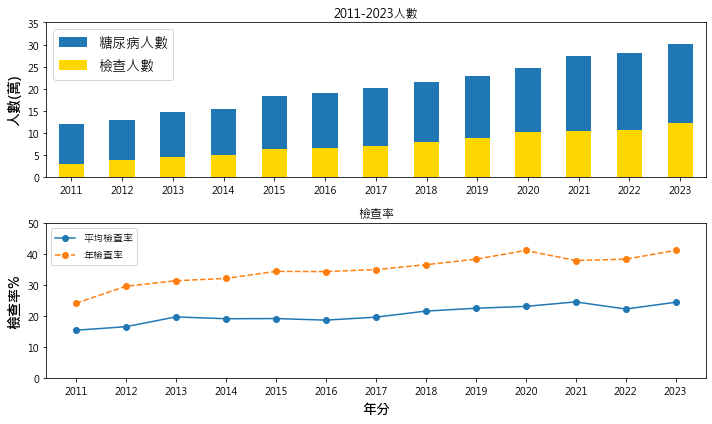

In [22]:
# 匯出總檢查-年分折線圖
plt.figure(figsize=(12,8))
fig,ax=plt.subplots(2,figsize=(10,6))
data=df_year[['amount_sum','total_sum','indicator_mean','indicator_year']]
data.columns=['檢查人數','糖尿病人數','平均檢查率','年檢查率']

# 圖一
(data[['糖尿病人數']]).plot(kind='bar',ax=ax[0])
(data[['檢查人數']]).plot(kind='bar',ax=ax[0],color='gold')
ax[0].set_title('2011-2023人數',fontsize=12)
ax[0].set_ylabel('人數(萬)',fontsize=14,fontweight='heavy')
ax[0].set_yticks(np.arange(0,400000,50000),np.arange(0,40,5))
ax[0].set_xlabel('')
ax[0].tick_params(axis='x',rotation=0)
ax[0].legend(fontsize=14)
# ax[0].set_xticks(np.arange(2011,2024,1))

# 圖二
data[['平均檢查率','年檢查率']].plot(ax=ax[1],style=['-o','--o'])
ax[1].set_title('檢查率',fontsize=12)
ax[1].set_ylabel('檢查率%',fontsize=14,fontweight='heavy')
ax[1].set_yticks(np.arange(0,60,10))

plt.xlabel('年分',fontsize=14,fontweight='heavy')
plt.xticks(np.arange(2011,2024,1))
plt.tight_layout()
#plt.savefig('./graph/year_total.png')
plt.show()

## 年分與類別 

In [23]:
# 年份與類別群組,
df_byyear_category=df.groupby(['year','category'])
df_year_category=df_byyear_category.agg({'amount':'sum','total':'sum'})

# 檢查率排除無紀錄醫院
without_norecord=df_nozero.groupby(['year','category']).agg({'indicator':'mean'})
df_year_category['indicator']=without_norecord
df_year_category.columns=['amount_sum', 'total_sum','indicator_mean']
# 增加年檢查率
df_year_category['indicator_year']=(df_year_category['amount_sum']/df_year_category['total_sum'])*100
df_year_category

amount_sum  total_sum  indicator_mean  indicator_year
year category                                                       
2011 區域醫院         11384.0    38623.0       29.586000       29.474665
     地區醫院          2433.0     9573.0       16.460556       25.415230
     診所           10789.0    54340.0       15.199320       19.854619
     醫學中心          4412.0    17954.0       24.570000       24.573911
2012 區域醫院         12549.0    42317.0       29.678000       29.654749
     地區醫院          2508.0     9986.0       15.783889       25.115161
     診所           12363.0    58784.0       16.358320       21.031233
     醫學中心         11109.0    19280.0       57.610000       57.619295
2013 區域醫院         14462.0    49043.0       29.492000       29.488408
     地區醫院          2757.0    10835.0       15.965263       25.445316
     診所           15550.0    63681.0       19.642474       24.418586
     醫學中心         13103.0    22777.0       57.530000       57.527330
2014 區域醫院         16368.0    51727.0       31.450000       31.643049
     地區醫院          2892.0    11227.0       15.346316       25.759330
     診所           16364.0    68398.0       19.033023       23.924676
     醫學中心         14123.0    23603.0       59.840000       59.835614
2015 區域醫院         22318.0    68077.0       29.845000       32.783466
     地區醫院          4038.0    15694.0       17.712800       25.729578
     診所           17660.0    74388.0       18.991059       23.740388
     醫學中心         18771.0    24537.0       76.500000       76.500795
2016 區域醫院         24091.0    71050.0       30.330000       33.907108
     地區醫院          4622.0    16296.0       20.255185       28.362788
     診所           18775.0    78624.0       18.380671       23.879477
     醫學中心         18117.0    25268.0       71.700000       71.699383
2017 區域醫院         26508.0    74375.0       31.970000       35.641008
     地區醫院          4694.0    16616.0       18.460370       28.249880
     診所           20755.0    83978.0       19.420416       24.714806
     醫學中心         18631.0    26998.0       69.010000       69.008815
2018 區域醫院         29625.0    79663.0       34.150000       37.187904
     地區醫院          5887.0    17535.0       21.056897       33.572854
     診所           24531.0    89860.0       21.367413       27.299132
     醫學中心         18633.0    28351.0       65.720000       65.722549
2019 區域醫院         33010.0    84067.0       35.956667       39.266299
     地區醫院          6566.0    18233.0       23.999655       36.011627
     診所           30430.0    98140.0       22.223837       31.006725
     醫學中心         17924.0    29099.0       61.600000       61.596618
2020 區域醫院         39502.0    85325.0       40.415556       46.295927
     地區醫院          9310.0    21646.0       24.287667       43.010256
     診所           35098.0   110185.0       22.806390       31.853701
     醫學中心         17361.0    29067.0       59.730000       59.727526
2021 區域醫院         36793.0    86099.0       38.026667       42.733365
     地區醫院          9932.0    27127.0       23.724062       36.612969
     診所           40285.0   132321.0       24.381750       30.444903
     醫學中心         16847.0    28587.0       58.930000       58.932382
2022 區域醫院         37421.0    87811.0       38.265556       42.615390
     地區醫院         11305.0    28525.0       19.783438       39.631902
     診所           41039.0   136988.0       22.097786       29.958099
     醫學中心         17857.0    27605.0       64.690000       64.687557
2023 區域醫院         40723.0    92743.0       40.181111       43.909513
     地區醫院         13195.0    31107.0       20.202727       42.418105
     診所           48753.0   148561.0       24.340917       32.816823
     醫學中心         20982.0    27928.0       75.130000       75.128903

<Figure size 864x864 with 0 Axes>

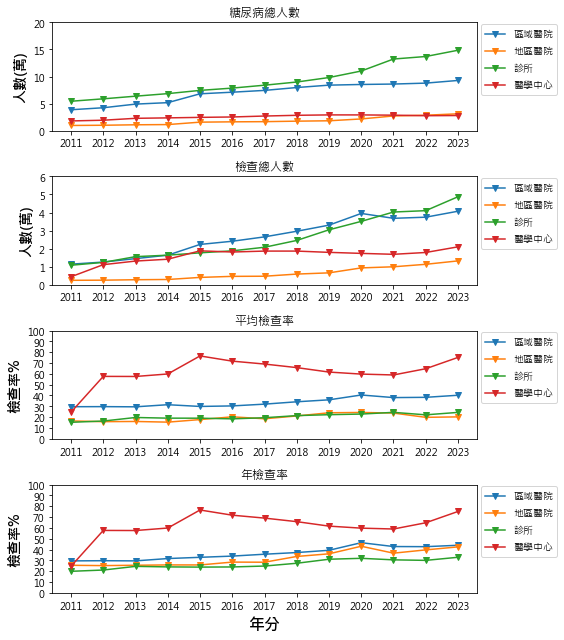

In [24]:
# 新北市糖尿病患者
plt.figure(figsize=(12,12))
fig,ax=plt.subplots(4,figsize=(8,9))

# 圖糖尿病人數
(df_year_category['total_sum'].unstack()).plot(style='-v',ax=ax[0])
ax[0].set_title('糖尿病總人數',fontsize=12)
ax[0].set_ylabel('人數(萬)',fontsize=14,fontweight='heavy')
ax[0].set_yticks(np.arange(0,250000,50000),np.arange(0,25,5))
ax[0].legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
ax[0].set_xticks(np.arange(2011,2024,1))
ax[0].set_xlabel('')

# 圖檢查人數
(df_year_category['amount_sum'].unstack()).plot(style='-v',ax=ax[1])
ax[1].set_title('檢查總人數',fontsize=12)
ax[1].set_ylabel('人數(萬)',fontsize=14,fontweight='heavy')
ax[1].set_yticks(np.arange(0,70000,10000),np.arange(0,7,1))
ax[1].legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
ax[1].set_xticks(np.arange(2011,2024,1))
ax[1].set_xlabel('')

# 圖平均檢查率
(df_year_category['indicator_mean'].unstack()).plot(style='-v',ax=ax[2])
ax[2].set_title('平均檢查率',fontsize=12)
ax[2].set_ylabel('檢查率%',fontsize=14,fontweight='heavy')
ax[2].set_yticks(np.arange(0,110,10))
ax[2].legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
ax[2].set_xticks(np.arange(2011,2024,1))
ax[2].set_xlabel('')

# 圖平均檢查率
(df_year_category['indicator_year'].unstack()).plot(style='-v',ax=ax[3])
ax[3].set_title('年檢查率',fontsize=12)
ax[3].set_ylabel('檢查率%',fontsize=14,fontweight='heavy')
ax[3].set_yticks(np.arange(0,110,10))
ax[3].legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
ax[3].set_xticks(np.arange(2011,2024,1))
ax[3].set_xlabel('')

plt.xlabel('年分',fontsize=16,fontweight='heavy')
plt.tight_layout()
plt.savefig('./graph/year_category.png')
plt.show()